In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
import seaborn as sns


In [2]:
# Allow printing more columns
pd.options.display.width = None
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 3000)

In [3]:
# Do not show pandas warnings
pd.set_option('mode.chained_assignment', None)

In [4]:
df = pd.read_csv('./zadanie1_dataset.csv')

In [5]:
# rpint the number of rows and columns
print("Number of rows and columns: ", df.shape)

Number of rows and columns:  (11960, 19)


In [6]:
# Read the columns and print them
columns = df.columns
print(columns)

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'popularity', 'number_of_artists', 'explicit', 'name', 'url', 'genres',
       'filtered_genres', 'top_genre', 'emotion'],
      dtype='object')


In [7]:
# Print min and max values of columns before removing outliers
print("*"*100, "Before removing outliers", "*"*100)
print("-"*10, "Min", "-"*10)
print(df.min(numeric_only=True))
print("-"*10, "Max", "-"*10)
print(df.max(numeric_only=True))

**************************************************************************************************** Before removing outliers ****************************************************************************************************
---------- Min ----------
danceability              0.0
energy               0.000197
loudness              -47.046
speechiness               0.0
acousticness              0.0
instrumentalness          0.0
liveness              0.00967
valence                   0.0
tempo                     0.0
duration_ms         -427346.0
popularity                0.0
number_of_artists         1.0
explicit                False
dtype: object
---------- Max ----------
danceability                8.375
energy                        1.0
loudness                    1.519
speechiness                 0.965
acousticness                0.996
instrumentalness            0.994
liveness                    0.997
valence                     0.995
tempo                     241.423
duration_ms

In [8]:
# Remove unnecessary columns
# df = df.drop(columns=['number_of_artists', 'url', 'name', 'genres', 'filtered_genres', 'top_genre'])
df = df.drop(columns=['url', 'name', 'genres', 'filtered_genres', 'top_genre'])



In [9]:
# Print min and max values of columns before removing outliers
print("*"*100, "Before removing outliers", "*"*100)
print("-"*10, "Min", "-"*10)
print(df.min(numeric_only=True))
print("-"*10, "Max", "-"*10)
print(df.max(numeric_only=True))

**************************************************************************************************** Before removing outliers ****************************************************************************************************
---------- Min ----------
danceability              0.0
energy               0.000197
loudness              -47.046
speechiness               0.0
acousticness              0.0
instrumentalness          0.0
liveness              0.00967
valence                   0.0
tempo                     0.0
duration_ms         -427346.0
popularity                0.0
number_of_artists         1.0
explicit                False
dtype: object
---------- Max ----------
danceability                8.375
energy                        1.0
loudness                    1.519
speechiness                 0.965
acousticness                0.996
instrumentalness            0.994
liveness                    0.997
valence                     0.995
tempo                     241.423
duration_ms

In [10]:
# Deal with outliers - Remove outliers
df = df[(df['danceability'] >= 0) & (df['danceability'] <= 1)]
df = df[(df['loudness'] >= -60) & (df['loudness'] <= 0)]

In [11]:
# Print min and max values of columns before removing outliers
print("*"*100, "Before removing outliers", "*"*100)
print("-"*10, "Min", "-"*10)
print(df.min(numeric_only=True))
print("-"*10, "Max", "-"*10)
print(df.max(numeric_only=True))

**************************************************************************************************** Before removing outliers ****************************************************************************************************
---------- Min ----------
danceability              0.0
energy               0.000197
loudness              -47.046
speechiness               0.0
acousticness              0.0
instrumentalness          0.0
liveness              0.00967
valence                   0.0
tempo                     0.0
duration_ms         -427346.0
popularity                0.0
number_of_artists         1.0
explicit                False
dtype: object
---------- Max ----------
danceability                0.975
energy                        1.0
loudness                   -0.116
speechiness                 0.965
acousticness                0.996
instrumentalness            0.994
liveness                    0.997
valence                     0.995
tempo                     241.423
duration_ms

In [12]:
df = df[df['duration_ms'] > 0]

In [13]:
null_count = df.isnull().sum()
print("Number of null values in each column:")
print(null_count)

Number of null values in each column:
danceability           0
energy                 0
loudness               0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
duration_ms            0
popularity           116
number_of_artists    120
explicit               0
emotion                0
dtype: int64


In [14]:
df = df.dropna(subset=['popularity'])
df = df.dropna(subset=['number_of_artists'])

In [15]:
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:")
print(non_numeric_columns)

Non-numeric columns:
Index(['emotion'], dtype='object')


In [16]:
df = pd.get_dummies(df, columns=['emotion'], prefix=['emotion'])
df['explicit'] = df['explicit'].astype(int)

In [17]:
print(df.head())

   danceability  energy  loudness  speechiness  acousticness  \
0         0.638   0.781    -6.848       0.0285        0.0118   
1         0.744   0.816    -3.933       0.0372        0.1440   
2         0.721   0.768    -4.371       0.0685        0.2100   
3         0.700   0.782    -4.631       0.0542        0.4490   
4         0.764   0.587    -7.002       0.0298        0.0721   

   instrumentalness  liveness  valence    tempo  duration_ms  popularity  \
0          0.009530    0.3490    0.250  122.985     194640.0        34.0   
1          0.000009    0.0902    0.748  120.062     144000.0        52.0   
2          0.008430    0.2620    0.468  124.076     179032.0        45.0   
3          0.000000    0.1430    0.680  124.969     169901.0        46.0   
4          0.000006    0.0940    0.494   89.980     229573.0        45.0   

   number_of_artists  explicit  emotion_calm  emotion_energetic  \
0                3.0         0         False              False   
1                3.0    

In [18]:
# Split the data into input and output
X = df.drop(columns=['emotion_calm', 'emotion_energetic', 'emotion_happy', 'emotion_sad'])
y = df[['emotion_calm', 'emotion_energetic', 'emotion_happy', 'emotion_sad']].astype(int)

In [19]:
y

,emotion_calm,emotion_energetic,emotion_happy,emotion_sad
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
11955,0,0,0,1
11956,0,0,0,1
11957,0,0,0,1
11958,0,0,0,1


In [20]:
# Split dataset into train, valid and test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=69)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, shuffle=True, test_size=0.5, random_state=69)

In [21]:
# Print dataset shapes
print("*"*100, "Dataset shapes", "*"*100)
print(f"X_train: {X_train.shape}")
print(f"X_valid: {X_valid.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_valid: {y_valid.shape}")
print(f"y_test: {y_test.shape}")

**************************************************************************************************** Dataset shapes ****************************************************************************************************
X_train: (9354, 13)
X_valid: (1169, 13)
X_test: (1170, 13)
y_train: (9354, 4)
y_valid: (1169, 4)
y_test: (1170, 4)


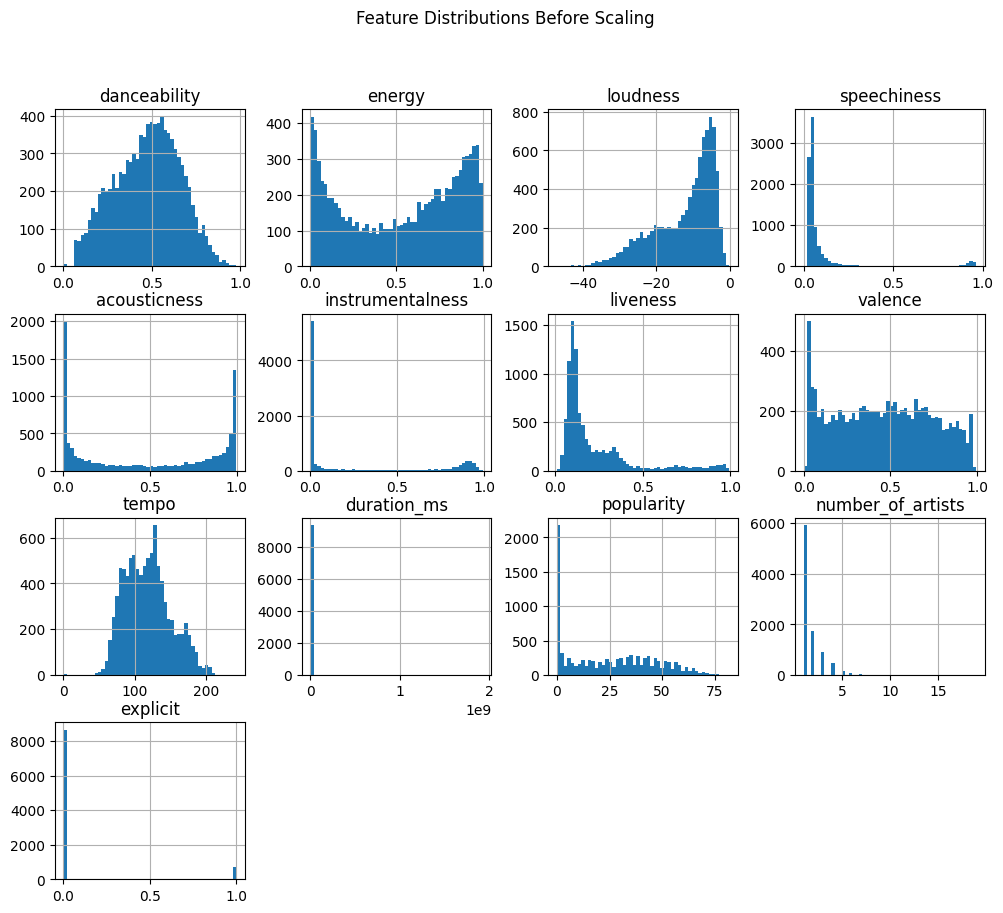

In [22]:
X_train.hist(figsize=(12, 10), bins=50)
plt.suptitle('Feature Distributions Before Scaling')
plt.show()

In [23]:
# Print min and max values of columns
print("*"*100, "Before scaling/standardizing", "*"*100)
print("-"*10, "Min", "-"*10)
print(X_train.min(numeric_only=True))
print("-"*10, "Max", "-"*10)
print(X_train.max(numeric_only=True))

**************************************************************************************************** Before scaling/standardizing ****************************************************************************************************
---------- Min ----------
danceability             0.000000
energy                   0.000197
loudness               -47.046000
speechiness              0.000000
acousticness             0.000000
instrumentalness         0.000000
liveness                 0.009670
valence                  0.000000
tempo                    0.000000
duration_ms          14080.000000
popularity               0.000000
number_of_artists        1.000000
explicit                 0.000000
dtype: float64
---------- Max ----------
danceability         9.750000e-01
energy               1.000000e+00
loudness            -1.160000e-01
speechiness          9.630000e-01
acousticness         9.960000e-01
instrumentalness     9.930000e-01
liveness             9.970000e-01
valence              9

In [24]:
# Standardize data
scaler = StandardScaler()
# !!!!!
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [25]:
# Convert numpy arrays to pandas DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_valid = pd.DataFrame(X_valid, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

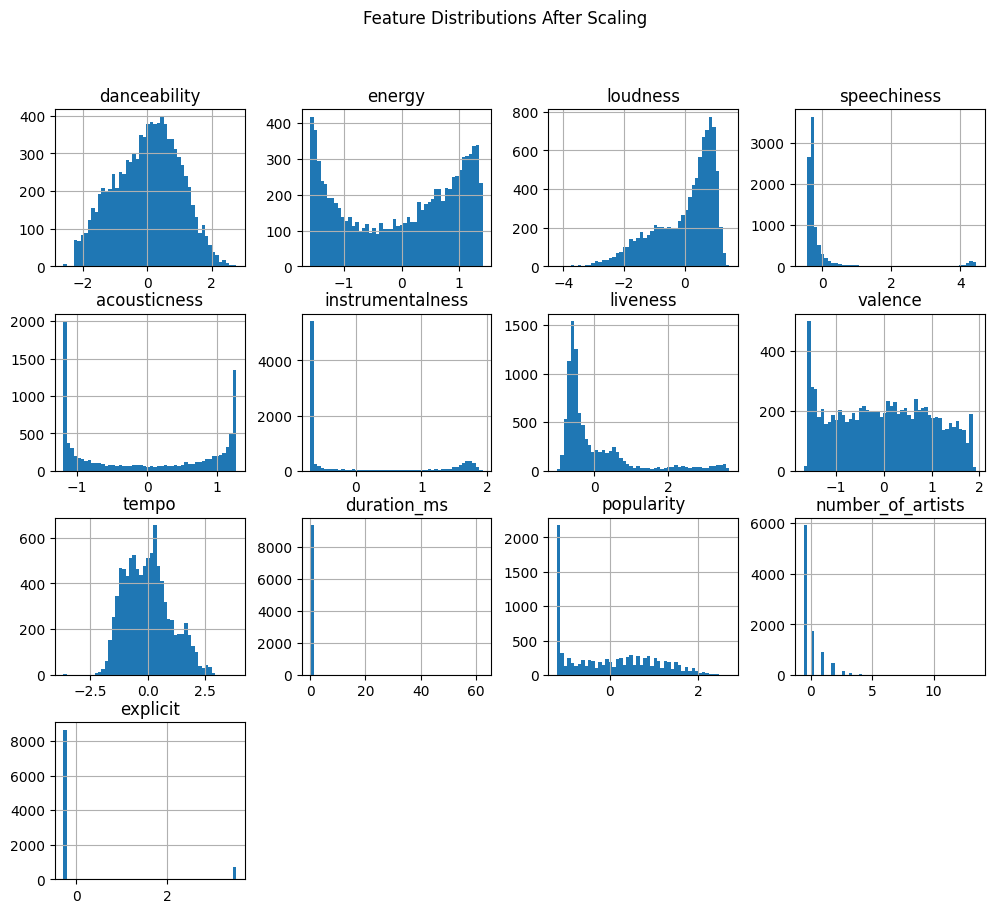

In [26]:
# after standardization
X_train.hist(figsize=(12, 10), bins=50)
plt.suptitle('Feature Distributions After Scaling')
plt.show()

In [27]:
count_no_lyrics = df[df['explicit'] == False].shape[0]
print(f"Number of rows without lyrics: {count_no_lyrics}")

Number of rows without lyrics: 10804


In [28]:
# Print min and max values of columns
print("*"*100, "After scaling/standardizing", "*"*100)
print("-"*10, "Min", "-"*10)
print(X_train.min(numeric_only=True))
print("-"*10, "Max", "-"*10)
print(X_train.max(numeric_only=True))

**************************************************************************************************** After scaling/standardizing ****************************************************************************************************
---------- Min ----------
danceability        -2.591919
energy              -1.592419
loudness            -4.215213
speechiness         -0.544167
acousticness        -1.195327
instrumentalness    -0.697027
liveness            -1.007739
valence             -1.668403
tempo               -3.673342
duration_ms         -0.030240
popularity          -1.189819
number_of_artists   -0.555398
explicit            -0.284407
dtype: float64
---------- Max ----------
danceability          2.752920
energy                1.411803
loudness              1.484067
speechiness           4.462768
acousticness          1.268801
instrumentalness      1.936818
liveness              3.644710
valence               1.931647
tempo                 3.860696
duration_ms          62.533156
pop

In [29]:
unique_combinations = y_train.drop_duplicates().shape[0]
random_accuracy = 1 / unique_combinations

print(f"Random accuracy based on unique combinations: {random_accuracy}")


Random accuracy based on unique combinations: 0.25


In [30]:
clf = MLPClassifier(
    hidden_layer_sizes=(128, 128, 128),
    random_state=1,
    validation_fraction=0.2,
    early_stopping=True,
    learning_rate='adaptive',
    learning_rate_init=0.0005,
).fit(X_train, y_train)

In [ ]:
# Predict on train set
y_pred = clf.predict(X_train)

In [ ]:
# Convert one-hot encoded y_test and y_pred to integer labels
y_train_int = np.argmax(y_train.values, axis=1)
y_pred_int = np.argmax(y_pred, axis=1)

In [ ]:
# Calculate accuracy
print('MLP accuracy on train set:', accuracy_score(y_train_int, y_pred_int))

# Generate confusion matrix
cm_train = confusion_matrix(y_train_int, y_pred_int)

MLP accuracy on train set: 0.8709642933504383


In [ ]:
# Predict on test set
y_pred = clf.predict(X_test)

In [ ]:
# Convert one-hot encoded y_test and y_pred to integer labels
y_test_int = np.argmax(y_test.values, axis=1)
y_pred_int = np.argmax(y_pred, axis=1)

In [ ]:
# Calculate accuracy
print('MLP accuracy on test set:', accuracy_score(y_test_int, y_pred_int))

# Generate confusion matrix
cm_test = confusion_matrix(y_test_int, y_pred_int)

MLP accuracy on test set: 0.8589743589743589


In [ ]:
# Get class names for the one-hot encoded 'emotion' column
class_names = [col for col in df.columns if col.startswith('emotion_')]

# Optionally, you can remove the 'emotion_' prefix to get the original emotion names
class_names = [col.replace('emotion_', '') for col in class_names]


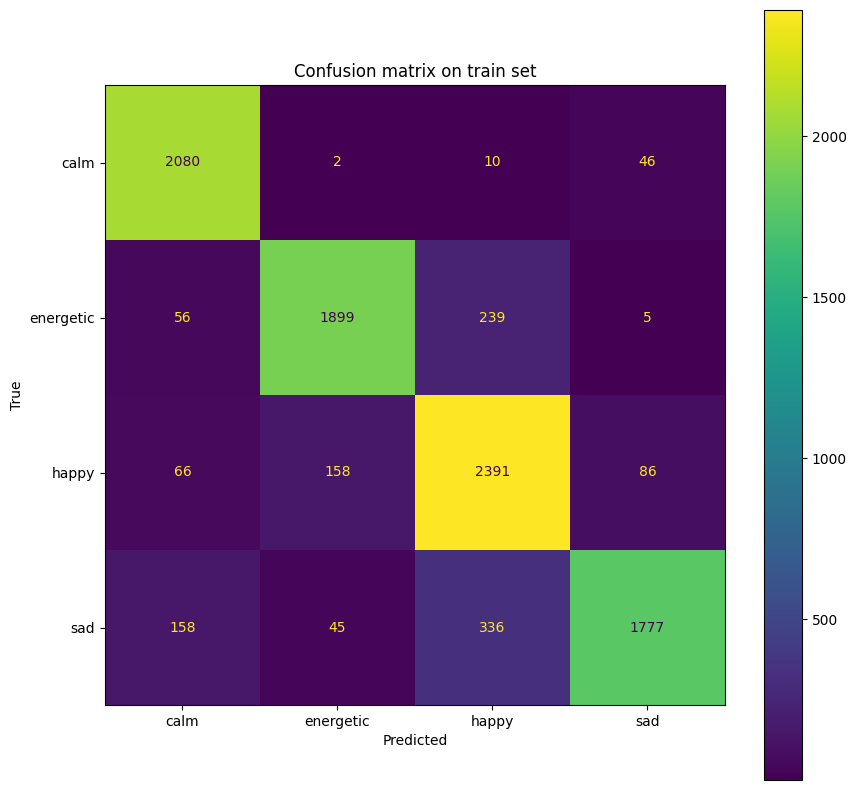

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
disp.ax_.set_title("Confusion matrix on train set")
disp.ax_.set(xlabel='Predicted', ylabel='True')
plt.show()

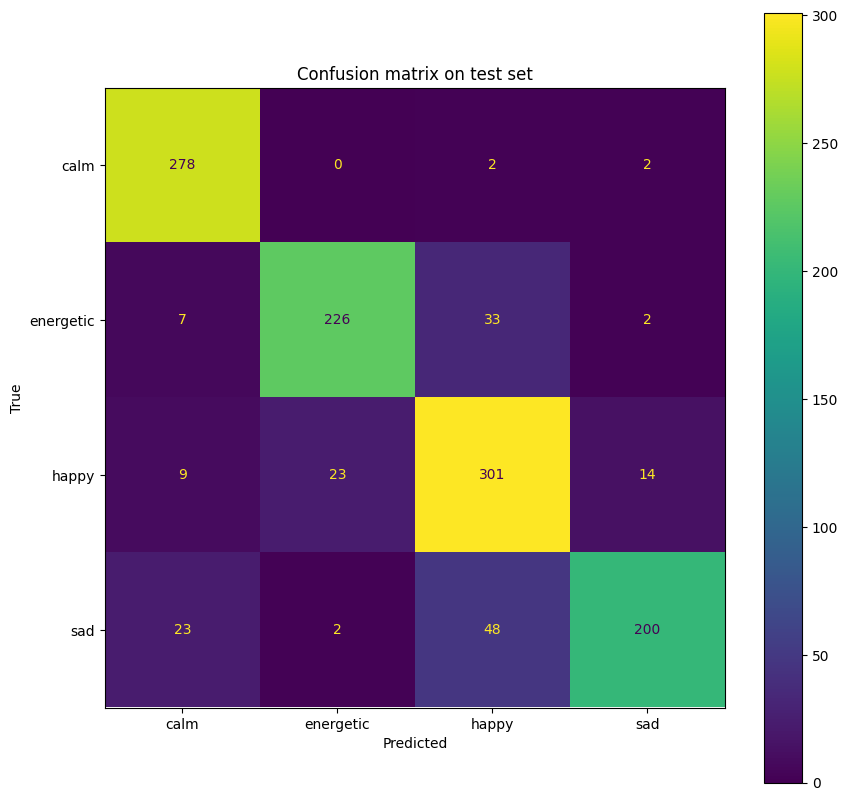

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
disp.ax_.set_title("Confusion matrix on test set")
disp.ax_.set(xlabel='Predicted', ylabel='True')
plt.show()

In [ ]:
original_dataset_path = './zadanie1_dataset.csv'
df_original = pd.read_csv(original_dataset_path)

# Display the first few rows of the original dataset to understand its structure
df_original.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,number_of_artists,explicit,name,url,genres,filtered_genres,top_genre,emotion
0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,194640.0,34.0,3.0,False,Fantasy - Felix Jaehn Remix,https://open.spotify.com/track/7KCWmFdw0TzoJbK...,"['tropical house', 'german dance', 'pop dance'...",['edm'],edm,happy
1,0.744,0.816,-3.933,0.0372,0.1440,0.000009,0.0902,0.748,120.062,144000.0,52.0,3.0,False,Turning Me Up (Hadal Ahbek),https://open.spotify.com/track/4sofJiicQwKsRo3...,"['pop dance', 'edm', 'indonesian viral pop', '...",['edm'],edm,happy
2,0.721,0.768,-4.371,0.0685,0.2100,0.008430,0.2620,0.468,124.076,179032.0,45.0,3.0,True,Problems,https://open.spotify.com/track/2dyrLrVopYKGc3H...,"['progressive electro house', 'progressive hou...",['edm'],edm,energetic
3,0.700,0.782,-4.631,0.0542,0.4490,0.000000,0.1430,0.680,124.969,169901.0,46.0,3.0,False,Closer (feat. Lilly Ahlberg),https://open.spotify.com/track/5FDdviWQzhw7NWH...,"['uk dance', 'tech house', 'pop dance', 'scand...",['house'],house,happy
4,0.764,0.587,-7.002,0.0298,0.0721,0.000006,0.0940,0.494,89.980,229573.0,45.0,2.0,False,Everything's Gonna Be Alright,https://open.spotify.com/track/2NEBP8SXEqwZt2P...,"['country road', 'country', 'contemporary coun...",['country'],country,happy


In [ ]:
# Overview of data types and null values
print(df_original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11960 entries, 0 to 11959
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   danceability       11960 non-null  float64
 1   energy             11960 non-null  float64
 2   loudness           11960 non-null  float64
 3   speechiness        11960 non-null  float64
 4   acousticness       11960 non-null  float64
 5   instrumentalness   11960 non-null  float64
 6   liveness           11960 non-null  float64
 7   valence            11960 non-null  float64
 8   tempo              11960 non-null  float64
 9   duration_ms        11960 non-null  float64
 10  popularity         11843 non-null  float64
 11  number_of_artists  11839 non-null  float64
 12  explicit           11960 non-null  bool   
 13  name               11960 non-null  object 
 14  url                11960 non-null  object 
 15  genres             11960 non-null  object 
 16  filtered_genres    119

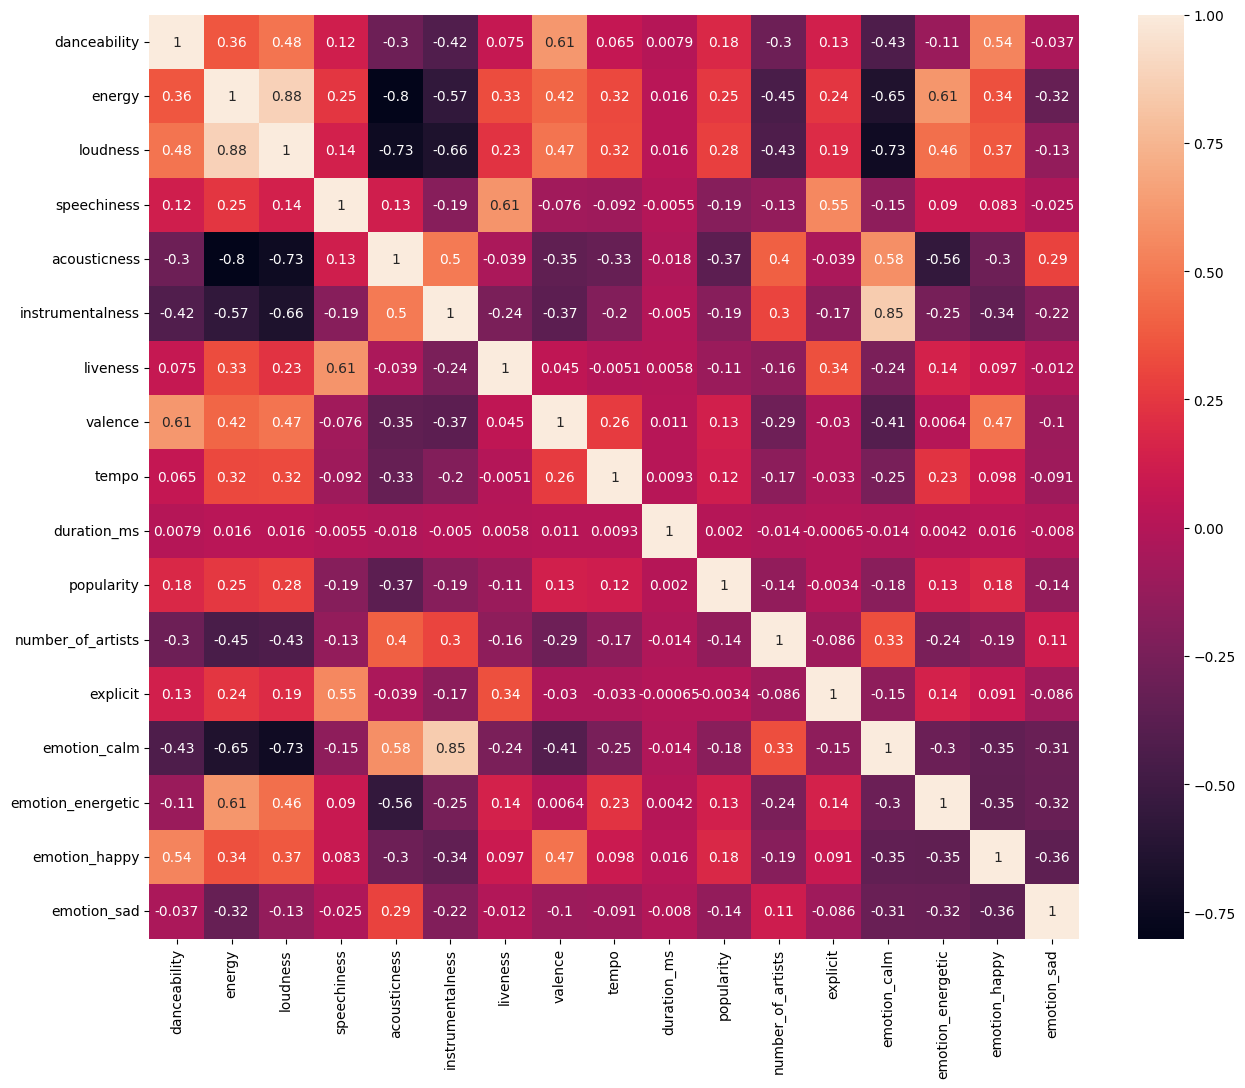

In [ ]:
df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
# Energy and Loudness: High positive correlation (0.87) suggests tracks that are louder are generally more energetic.
# The relationship between acousticness and energy shows a moderate negative correlation of −0.80 
# This suggests that tracks with higher acousticness generally tend to have lower energy levels.
# calm emotions are negatively correlated with energy and loudness

In [ ]:
# print df columns
print(df.columns)

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'popularity', 'number_of_artists', 'explicit', 'emotion_calm',
       'emotion_energetic', 'emotion_happy', 'emotion_sad'],
      dtype='object')


/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


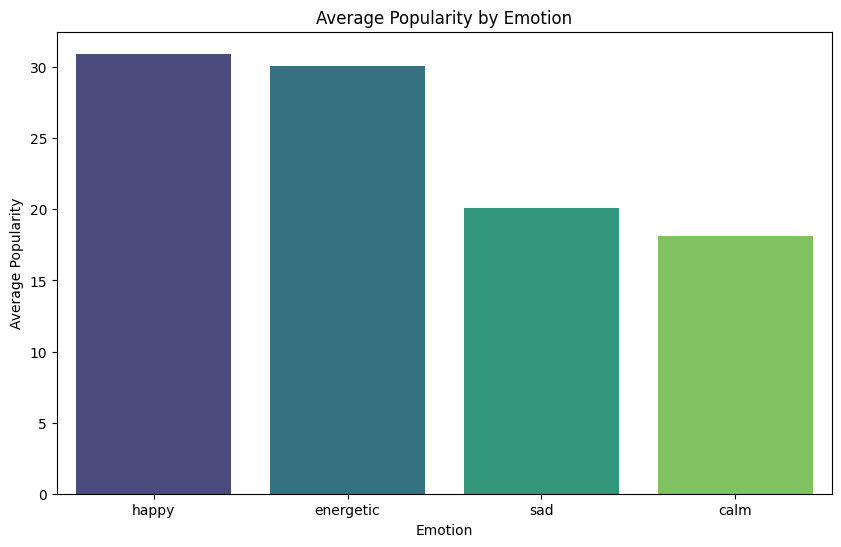

In [ ]:
# Grouping the data by 'emotion' and calculating the average 'popularity' for each group
emotion_popularity = df_original.groupby('emotion')['popularity'].mean().sort_values(ascending=False)

# Creating the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_popularity.index, y=emotion_popularity.values, palette='viridis')
plt.title('Average Popularity by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Average Popularity')
plt.show()


In [ ]:
# The more happy and energetic the song the popular it is 

In [ ]:
# Calculate mean, median, and count for each emotion
emotion_stats = df_original.groupby('emotion')['popularity'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)

print(emotion_stats)


                mean  median  count
emotion                            
happy      30.949445    33.0   3422
energetic  30.119526    34.0   2786
sad        20.065708    16.0   2922
calm       18.128640    13.0   2713


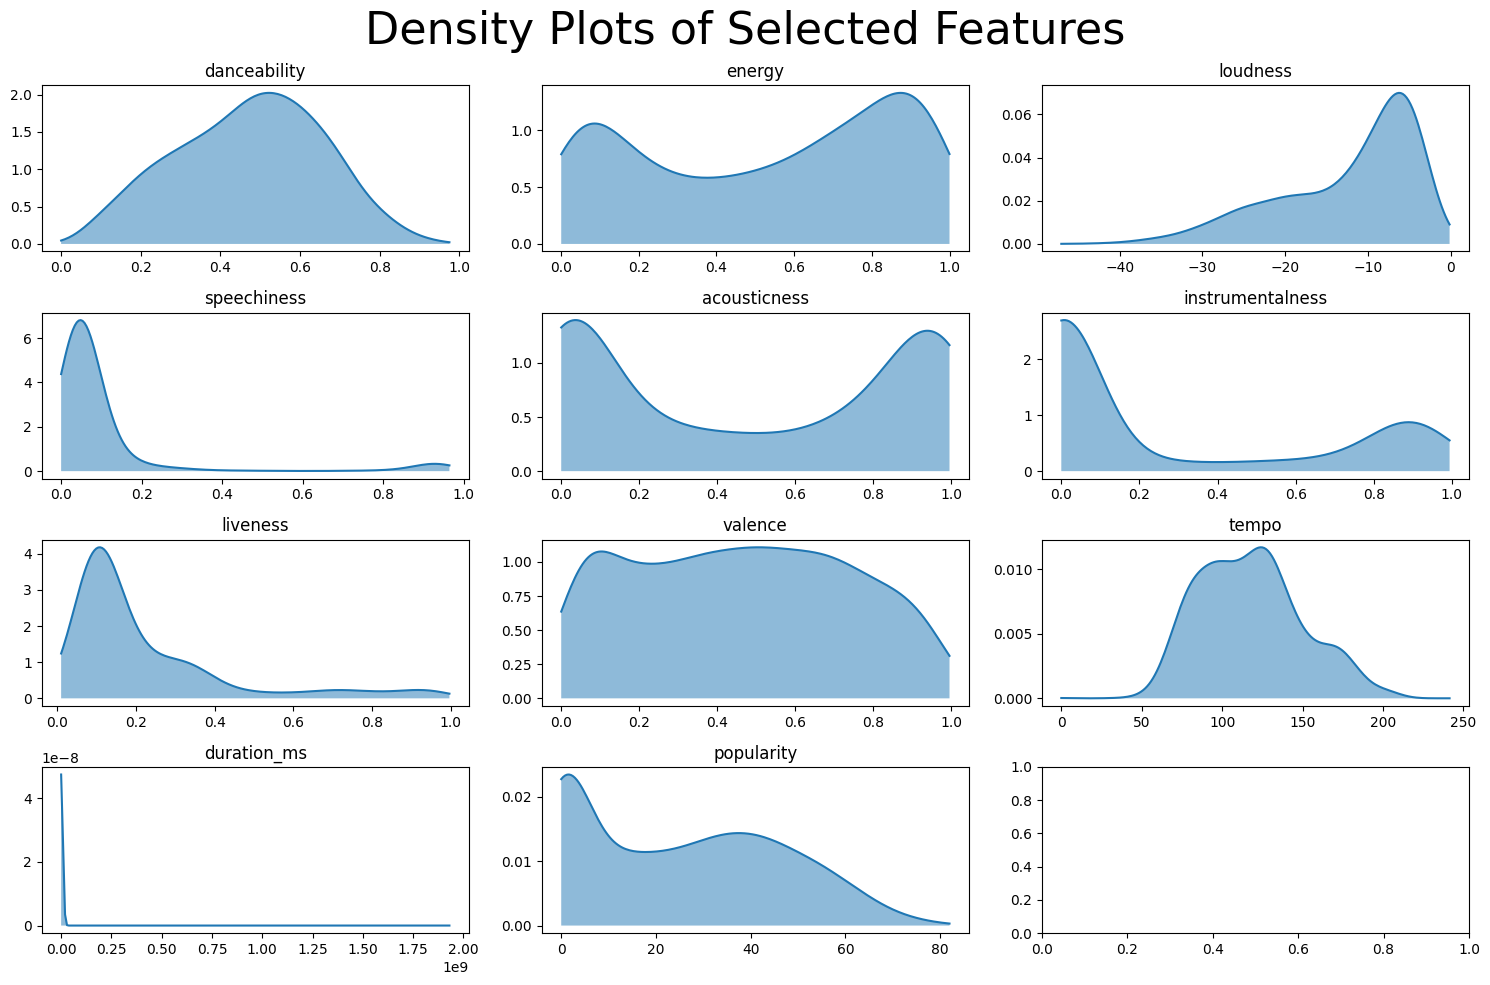

In [ ]:
from scipy.stats import gaussian_kde
# Select specific columns (assuming these are the columns you're interested in)
selected_columns = ['danceability', 'energy', 'loudness', 'speechiness', 
                    'acousticness', 'instrumentalness', 'liveness', 'valence', 
                    'tempo', 'duration_ms', 'popularity']

# Initialize the matplotlib figure
fig, axs = plt.subplots(4, 3, figsize=(15, 10))

# Reshape axs to 1-D array
axs = axs.ravel()

# Generate density plots
for i, feature in enumerate(selected_columns):
    data = df[feature].dropna()  # Drop NaN values if any
    density = gaussian_kde(data)
    xs = np.linspace(min(data), max(data), 200)
    density.covariance_factor = lambda: 0.25
    density._compute_covariance()
    axs[i].plot(xs, density(xs), label=f"{feature}")
    axs[i].fill_between(xs, density(xs), alpha=0.5)
    axs[i].set_title(f"{feature}")
    # axs[i].set_xlabel(feature)
    # axs[i].set_ylabel('Density')

# Set a title for the entire grid
fig.suptitle('Density Plots of Selected Features', fontsize=32)
plt.tight_layout()
plt.show()

In [ ]:
df_cleaned =  df_original[(df_original['danceability'] >= 0) & (df_original['danceability'] <= 1)]

/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

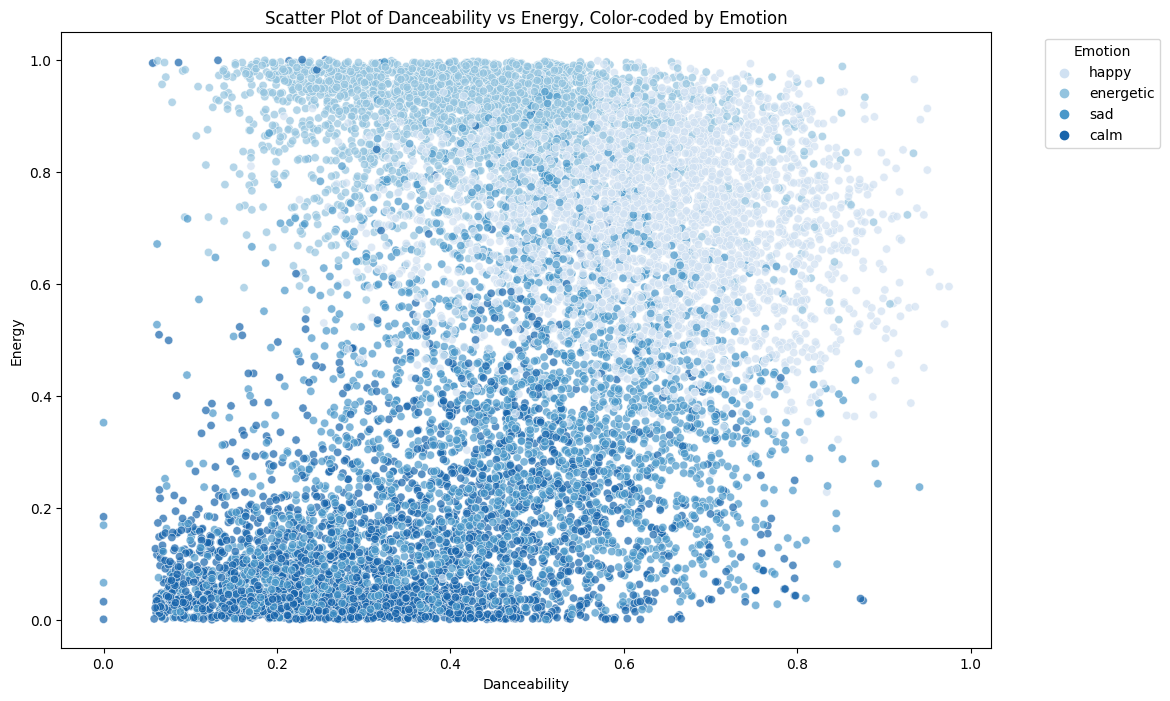

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='danceability', y='energy', hue='emotion', data=df_cleaned, palette='Blues', alpha=0.7)
plt.title('Scatter Plot of Danceability vs Energy, Color-coded by Emotion')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
# ChatGPT

In [ ]:
# Happy songs are often more danceable and energetic than sad songs.

In [ ]:
# Find the genres that are most likely to be explicit
most_explicit_genres = df_cleaned.groupby('top_genre')['explicit'].mean().sort_values(ascending=False).head(10)

/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


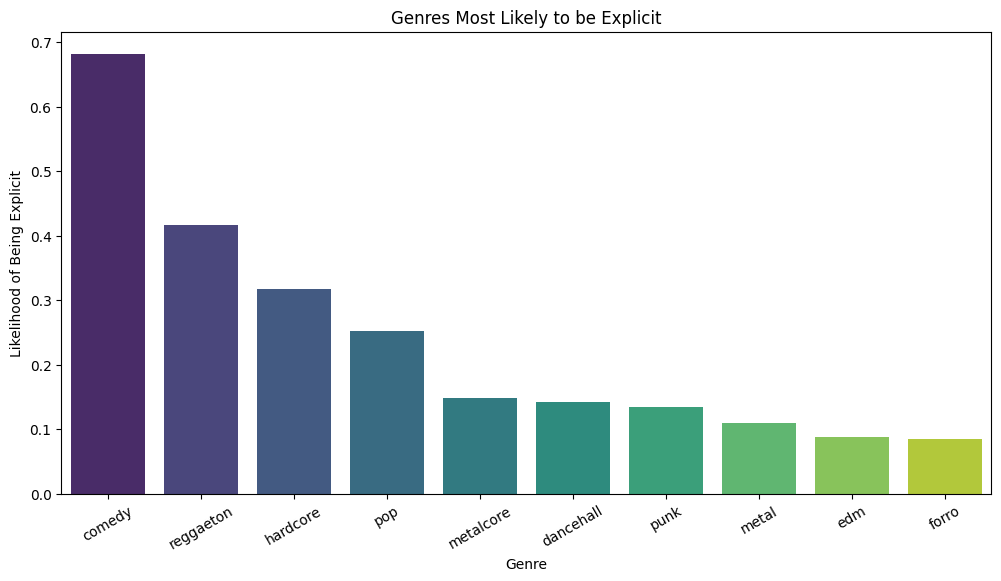

In [ ]:
# Plotting the genres that are most likely to be explicit
plt.figure(figsize=(12, 6))
sns.barplot(x=most_explicit_genres.index, y=most_explicit_genres.values, palette="viridis")
plt.title('Genres Most Likely to be Explicit')
plt.xlabel('Genre')
plt.ylabel('Likelihood of Being Explicit')
plt.xticks(rotation=30)
plt.show()

In [ ]:
## 3rd task
# USE ADAM or SDG with moment in order to get out of local minima
# USE RELU
# High Rate of learning might not be able to find the global minima, low will not get u there
# velka siet = high learning rate
# mala siet - low learning rate
# zastavovat trenovanie podla chyby, validation error
# architerkura 
# model add dense 4 activation softmax, 
# multiclass cross entropy
# 30+ batch size


In [ ]:
# print the columns
print(df_original.columns)

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'popularity', 'number_of_artists', 'explicit', 'name', 'url', 'genres',
       'filtered_genres', 'top_genre', 'emotion'],
      dtype='object')


/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


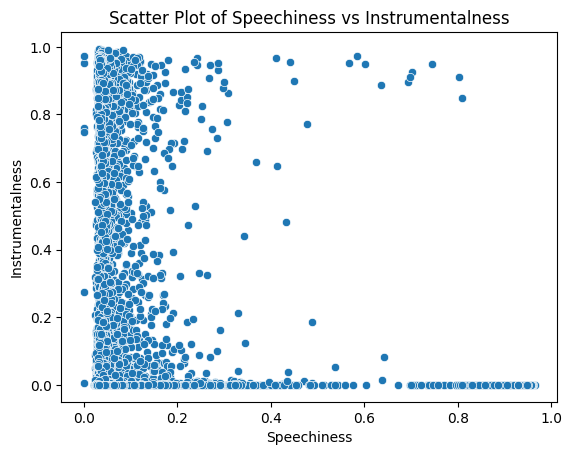

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
sns.scatterplot(x='speechiness', y='instrumentalness', data=df)
plt.title('Scatter Plot of Speechiness vs Instrumentalness')
plt.xlabel('Speechiness')
plt.ylabel('Instrumentalness')
plt.show()


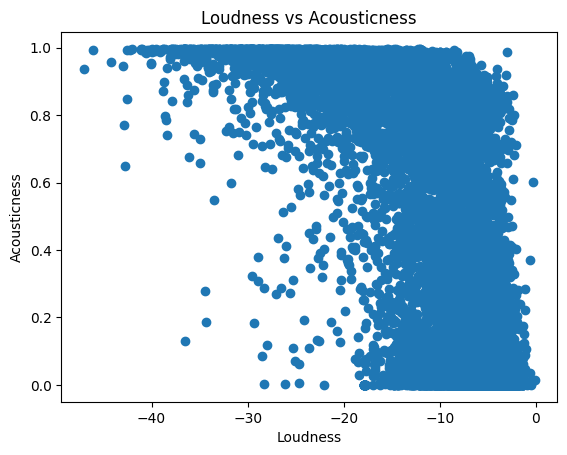

In [ ]:
plt.scatter(df['loudness'], df['acousticness'])
plt.xlabel('Loudness')
plt.ylabel('Acousticness')
plt.title('Loudness vs Acousticness')
plt.show()